In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np

import yass
from yass import preprocess
from yass import process
from yass import deconvolution

In [3]:
# configure logging module to get useful information
logging.basicConfig(level=logging.DEBUG)

# set yass configuration parameters
yass.set_config('../config/nnet100k.yaml')

cfg = yass.read_config()

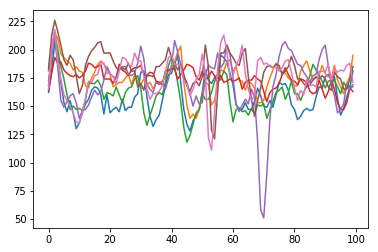

In [4]:
raw = np.fromfile(os.path.join(cfg.root, 'tmp/sample_100k.bin'),
                   dtype='int16').reshape((100000, 7))
for s in raw.T:
    plt.plot(s[:100])

plt.show()

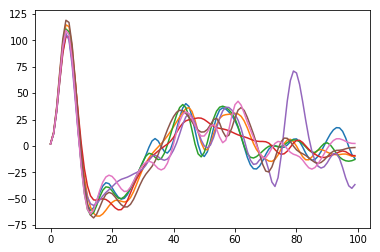

In [5]:
filtered = np.fromfile(os.path.join(cfg.root, 'tmp/filtered.bin'),
                   dtype='float').reshape((100000, 7))
for s in filtered.T:
    plt.plot(s[:100])

plt.show()

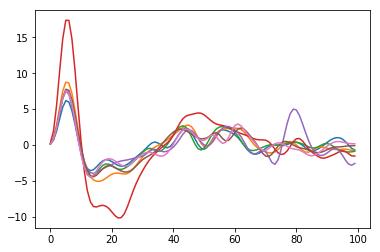

In [6]:
standarized = np.fromfile(os.path.join(cfg.root, 'tmp/standarized.bin'),
                   dtype='float').reshape((100000, 7))
for s in standarized.T:
    plt.plot(s[:100])

plt.show()

# Preprocessor

In [7]:
# run preprocessor
score, clr_idx, spt = preprocess.run()

INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
INFO:yass.preprocess.run:Initialized butterworth batch processor: BatchProcessor for file /users/Edu/data/yass/sample_100k.bin (1400000 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading batch 1...
DEBUG:yass.batch.batch:Closing file...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
DEBUG:yass.batch.batch:Loading batch 1...
INFO:yass.batch.batch:Number of batches: 1. Batch size: 100000 (observations  per channel. Residual: 0. Total number of observations 100000
INFO:yass.preprocess.run:Initialized standarization batch processor: BatchProcessor for file /users/Edu/data/yass/tmp/filtered.bin (5600000 bytes). Already processed 0 out of 1 batches. Max memory: 1000000000 bytes
DEBUG:yass.batch.batch:Loading 

INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt
DEBUG:yass.batch.batch:Closing file...
INFO:yass.preprocess.run:Preprocessing done in 4 seconds.
INFO:yass.preprocess.run:	reading data:	0 seconds
INFO:yass.preprocess.run:	filtering:	0 seconds
INFO:yass.preprocess.run:	standardization:	0 seconds
INFO:yass.preprocess.run:	detection:	2.473466 seconds
INFO:yass.preprocess.run:	whitening:	0.027103 seconds
INFO:yass.preprocess.run:	saving recording:	0.003208 seconds
INFO:yass.preprocess.run:	getting waveforms:	1.387668 seconds


In [8]:
score[1]

array([[[  2.42638847e-01,  -1.75553538e+00,   3.17991618e-01,
          -1.34329470e-01],
        [  1.12133070e+00,   6.20974243e+00,   1.31035218e+00,
           1.51575526e+00],
        [  4.54978199e-01,   9.70906731e+00,  -1.70826246e+00,
           2.61737889e+00]],

       [[ -3.47706851e+00,  -2.12739440e+00,   9.27645969e-01,
           6.45634603e-01],
        [  9.57698473e+00,   6.44587424e+00,  -3.18209315e+00,
           7.61804278e+00],
        [  9.69160813e+00,   1.40194208e+01,  -8.87585199e-01,
           3.58617438e+00]],

       [[ -2.89280022e+00,  -7.62221039e-01,   2.79424312e+00,
           6.22728040e-01],
        [  1.06762333e+01,   7.89723465e+00,  -1.94693734e+00,
           8.20247291e+00],
        [  9.37948095e+00,   1.39365489e+01,  -2.56505491e+00,
           4.27434402e+00]],

       [[ -4.10154164e+00,  -1.32514165e+00,   1.63858563e+00,
           3.04578401e+00],
        [  4.04333936e+00,   3.90887423e+00,   3.52944568e+00,
          -1.82275126

In [9]:
[s.shape for s in score]

[(24, 3, 7),
 (72, 3, 4),
 (14, 3, 4),
 (19, 3, 4),
 (140, 3, 4),
 (110, 3, 4),
 (164, 3, 4)]

In [10]:
[c.shape for c in clr_idx]

[(24,), (72,), (14,), (19,), (140,), (110,), (164,)]

In [11]:
clr_idx[0]

array([ 15,  24,  29,  31,  39,  64, 104, 105, 110, 111, 119, 123, 144,
       158, 163, 175, 177, 182, 222, 252, 265, 290, 305, 307])

In [12]:
[s.shape for s in spt]

[(309, 2), (1445, 2), (894, 2), (945, 2), (1258, 2), (975, 2), (950, 2)]

In [13]:
spt[0][24]

array([6952,    0], dtype=int32)

# Processor

In [14]:
# run processor
spike_train, spt_left, templates = process.run(score, clr_idx, spt)

INFO:yass.process.run:Triaging...
INFO:yass.process.run:Coresettting...
INFO:yass.process.run:Masking...
INFO:yass.process.run:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.process.run:Mainprocess done in 0 seconds.
INFO:yass.process.run:	triage:	0.008308 seconds
INFO:yass.process.run:	coreset:	0.096551 seconds
INFO:yass.process.run:	masking:	0.008003 seconds
INFO:yass.process.run:	clustering:	0.397527 seconds
INFO:yass.process.run:	make templates:	0.05246 seconds


('before clean spt clear', array([[  1,   0,  15],
       [  1,   0,  24],
       [  1,   0,  29],
       ..., 
       [  2,   6, 929],
       [  2,   6, 930],
       [  2,   6, 936]], dtype=int32), (451, 3))
('spt clear', array([[ 4747,     1],
       [ 6892,     1],
       [ 8163,     1],
       [ 8553,     1],
       [10192,     1],
       [19108,     1],
       [30338,     1],
       [32395,     1],
       [35210,     1],
       [49457,     1],
       [51978,     1],
       [53143,     1],
       [79251,     1],
       [83767,     1],
       [93769,     1],
       [99201,     1],
       [99449,     1],
       [ 2221,     1],
       [ 3571,     1],
       [ 5118,     1],
       [ 7783,     1],
       [ 9144,     1],
       [11792,     1],
       [12680,     1],
       [14647,     1],
       [15396,     1],
       [15481,     1],
       [17318,     1],
       [19328,     1],
       [19928,     1],
       [21602,     1],
       [23432,     1],
       [24229,     1],
       [24706,    

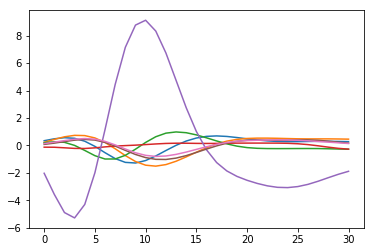

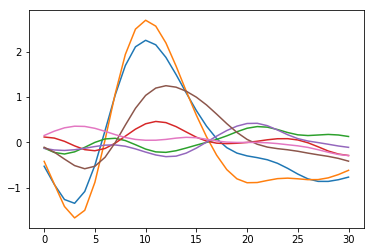

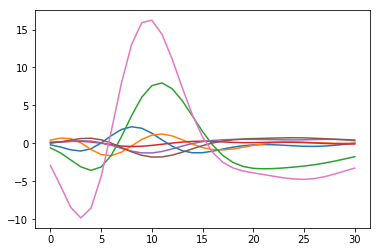

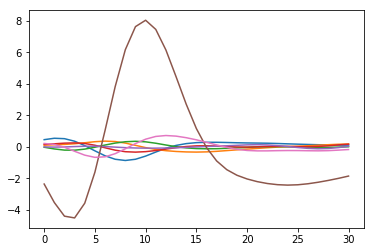

In [15]:
for t in np.transpose(templates,[2,1,0]):
    plt.plot(t)
    plt.show()



In [16]:
templates.shape

(7, 31, 4)

In [17]:
spike_train.shape

(451, 2)

In [18]:
[s.shape for s in spt_left]

[(292, 2), (1381, 2), (887, 2), (931, 2), (1142, 2), (881, 2), (811, 2)]

In [19]:
templates.shape

(7, 31, 4)

In [20]:
from yass.mainprocess import Mainprocessor
mp = Mainprocessor(cfg, score, clr_idx, spt)
_, _ = mp.mainProcess()

INFO:yass.mainprocess:Triaging...
INFO:yass.mainprocess:Coresettting...
INFO:yass.mainprocess:Masking...
INFO:yass.mainprocess:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Mainprocess done in 0 seconds.
INFO:yass.mainprocess:	triage:	0.007518 seconds
INFO:yass.mainprocess:	coreset:	0.097079 seconds
INFO:yass.mainprocess:	masking:	0.00691 seconds
INFO:yass.mainprocess:	clustering:	0.431107 seconds
INFO:yass.mainprocess:	make templates:	0.060648 seconds


('before clean spt clear', array([[  0,   0,  15],
       [  0,   0,  24],
       [  0,   0,  29],
       ..., 
       [  2,   6, 929],
       [  2,   6, 930],
       [  2,   6, 936]], dtype=int32), (444, 3))
('spt clear', array([[ 4747,     0],
       [ 6892,     0],
       [ 8163,     0],
       [10192,     0],
       [19108,     0],
       [30338,     0],
       [32395,     0],
       [35210,     0],
       [49457,     0],
       [51978,     0],
       [53143,     0],
       [79251,     0],
       [83767,     0],
       [93769,     0],
       [99201,     0],
       [99449,     0],
       [ 2221,     0],
       [ 3571,     0],
       [ 5118,     0],
       [ 7783,     0],
       [ 9144,     0],
       [11792,     0],
       [12680,     0],
       [14647,     0],
       [15396,     0],
       [15481,     0],
       [17318,     0],
       [19328,     0],
       [19928,     0],
       [21602,     0],
       [23432,     0],
       [24229,     0],
       [24706,     0],
       [26613,    

In [21]:
d = deconvolution.Deconvolution(cfg,
                                np.transpose(templates,[1,0,2]), spt_left)

In [22]:
spike_times_col = d.fullMPMU()

DEBUG:yass.deconvolution:wfile is /users/Edu/data/yass/tmp/wrec.bin 1401680
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [23]:
spike_times_col.shape

(539, 2)

In [24]:
whiten = np.fromfile(os.path.join(cfg.root, 'tmp/whiten.bin'),
                   dtype='int16')
whiten = whiten.reshape((100120, 7))

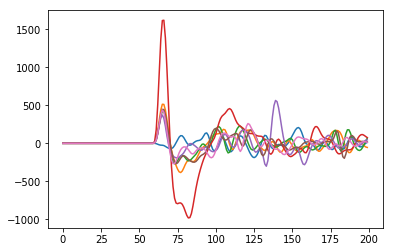

In [25]:
for t in whiten.T:
    plt.plot(t[:200])

plt.show()

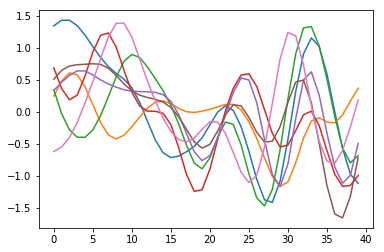

In [26]:
standarized = np.fromfile(os.path.join(cfg.root, 'tmp/standarized.bin'),
                   dtype='float').reshape((100000, 7))

for s in standarized.T:
    plt.plot(s[53203-20:53203+20])

plt.show()

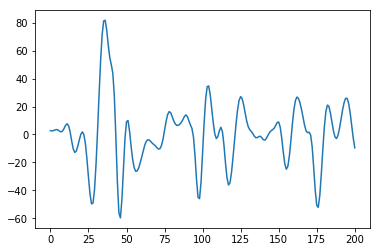

In [27]:
plt.plot(filtered[6952-100-1:6952+100,0])
plt.show()